<Figure size 1300x400 with 0 Axes>

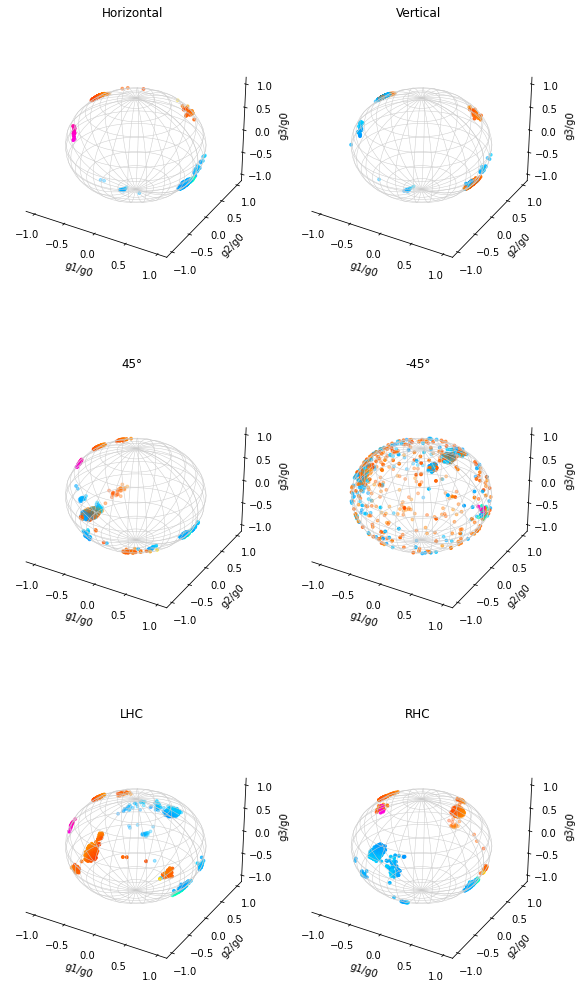

finished


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

date = '20221027'
action = 'air'
round = '2'
#freq = 1000

#f = sys.argv[1]
#freq =int(sys.argv[2])
#f = open(os.path.join(os.getcwd(),"../data",'{0}_{1}_{2}.dat'.format(date, action, round)), 'r')
df = np.genfromtxt(os.path.join(os.getcwd(),"../data",'{0}_{1}_{2}.dat'.format(date, action, round)), delimiter=",")
#df = np.genfromtxt(os.path.join(f), delimiter=",")
df = (df-2048)/2048*2500 #DA変換

freq = 1000
m_num = df.shape[0] #計測回数
tmax = m_num/freq #計測時間


fig = plt.figure(figsize=(13, 4),dpi=100)  # Figureを設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Tx1-Rx1 Svv=I1+jQ1
I1 = df[0::2, 0]
Q1 = df[0::2, 1]
A1 = np.sqrt((I1 **2 + Q1 ** 2))
P1=(np.arctan2(Q1,I1))
# Tx1-Rx2 Shv=I2+jQ2
I2 = df[0::2, 2]
Q2 = df[0::2, 3]
A2 = np.sqrt((I2 ** 2 + Q2 ** 2))
P2=(np.arctan2(Q2,I2))
# Tx2-Rx1 Svh=I3+jQ3
I3 = df[1::2, 0]
Q3 = df[1::2, 1]
A3 = np.sqrt((I3 ** 2 + Q3 ** 2))
P3=(np.arctan2(Q3,I3))
# Tx2-Rx2 Shh=I4+jQ4
I4 = df[1::2, 2]
Q4 = df[1::2, 3]
A4 = np.sqrt((I4 ** 2 + Q4 ** 2))
P4=(np.arctan2(Q4,I4))
cm = plt.cm.get_cmap('hsv') # カラーマップ

#平均ストークスベクトルg

#送信-水平偏波
g0 = (A4**2)+(A3**2)
g1 = (A4**2)-(A3**2)
g2= 2*(I3*I4+Q3*Q4)
g3= 2*(I4*Q3-I3*Q4)
#送信-垂直偏波
h0 = (A2**2)+(A1**2)
h1 = (A2**2)-(A1**2)
h2= 2*(I1*I2+Q1*Q2)
h3= 2*(I2*Q1-I1*Q2)
#送信‐45度偏波
m0 = 1/2*(((I2+I4)**2+(Q2+Q4)**2)+((I1+I3)**2+(Q1+Q3)**2))
m1 = 1/2*(((I2+I4)**2+(Q2+Q4)**2)-((I1+I3)**2+(Q1+Q3)**2))
m2 = 2*1/2*((I1+I3)*(I2+I4)+(Q1+Q3)*(Q2+Q4))
m3 = 2*1/2*((Q1+Q3)*(I2+I4)-(I1+I3)*(Q2+Q4))
#送信‐‐45度偏波
n0 = 1/2*(((I2-I4)**2+(Q2-Q4)**2)+((I1-I3)**2+(Q1-Q3)**2))
n1 = 1/2*(((I2-I4)**2+(Q2-Q4)**2)-((I1-I3)**2+(Q1-Q3)**2))
n2 = 2*1/2*((I1-I3)*(I2-I4)+(Q1-Q3)*(Q2-Q4))
n3 = 2*1/2*((Q1-Q3)*(I2-I4)-(I1-I3)*(Q2-Q4))
#送信-左円偏波
l0 = 1/2*(((I4-Q2)**2+(Q4+I2)**2)+((I3-Q1)**2+(Q3+I1)**2))
l1 = 1/2*(((I4-Q2)**2+(Q4+I2)**2)-((I3-Q1)**2+(Q3+I1)**2))
l2 = 2*1/2*((I3-Q1)*(I4-Q2)+(Q3+I1)*(Q4+I2))
l3 = 2*1/2*((Q3+I1)*(I4-Q2)-(I3-Q1)*(Q4+I2))
#送信-右円偏波
r0 = 1/2*(((I2-Q4)**2+(Q2+I4)**2)+((I1-Q3)**2+(Q1+I3)**2))
r1 = 1/2*(((I2-Q4)**2+(Q2+I4)**2)-((I1-Q3)**2+(Q1+I3)**2))
r2 = 2*1/2*((I1-Q3)*(I2-Q4)+(Q1+I3)*(Q2+I4))
r3 = 2*1/2*((Q1+I3)*(I2-Q4)-(I1-Q3)*(Q2+I4))


#図の作製
fig = plt.figure(figsize=(10,17.5))  # Figureを設定
plt.subplots_adjust(wspace=0.05, hspace=0.4)

#水平
ax1 = fig.add_subplot(3, 2, 1,projection='3d')   #2行3列の1番目
ax1.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax1.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax1.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax1.set_title("Horizontal",fontsize=12)
ax1.set_xlabel("g1/g0")
ax1.set_ylabel("g2/g0")
ax1.set_zlabel("g3/g0")
ax1.grid(color="white")
ax1.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax1.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax1.set_xticks(np.linspace(-1.0, 1.0, 5))
ax1.set_yticks(np.linspace(-1.0, 1.0, 5))
ax1.set_zticks(np.linspace(-1.0, 1.0, 5))

#垂直
ax4 = fig.add_subplot(3, 2, 2,projection='3d')   #2行3列の4番目
ax4.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax4.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax4.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax4.set_title("Vertical",fontsize=12)
ax4.set_xlabel("g1/g0")
ax4.set_ylabel("g2/g0")
ax4.set_zlabel("g3/g0")
ax4.grid(color="white")
ax4.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax4.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax4.set_xticks(np.linspace(-1.0, 1.0, 5))
ax4.set_yticks(np.linspace(-1.0, 1.0, 5))
ax4.set_zticks(np.linspace(-1.0, 1.0, 5))

#45度
ax2 = fig.add_subplot(3, 2, 3,projection='3d')   #2行3列の2番目
ax2.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax2.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax2.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax2.set_title("45°",fontsize=12)
ax2.set_xlabel("g1/g0")
ax2.set_ylabel("g2/g0")
ax2.set_zlabel("g3/g0")
ax2.grid(color="white")
ax2.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax2.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax2.set_xticks(np.linspace(-1.0, 1.0, 5))
ax2.set_yticks(np.linspace(-1.0, 1.0, 5))
ax2.set_zticks(np.linspace(-1.0, 1.0, 5))

#‐45度
ax5 = fig.add_subplot(3, 2, 4,projection='3d')   #2行3列の5番目
ax5.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax5.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax5.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax5.set_title("-45°",fontsize=12)
ax5.set_xlabel("g1/g0")
ax5.set_ylabel("g2/g0")
ax5.set_zlabel("g3/g0")
ax5.grid(color="white")
ax5.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax5.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax5.set_xticks(np.linspace(-1.0, 1.0, 5))
ax5.set_yticks(np.linspace(-1.0, 1.0, 5))
ax5.set_zticks(np.linspace(-1.0, 1.0, 5))

#左円
ax3 = fig.add_subplot(3, 2, 5,projection='3d')   #2行3列の3番目
ax3.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax3.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax3.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax3.set_title("LHC",fontsize=12)
ax3.set_xlabel("g1/g0")
ax3.set_ylabel("g2/g0")
ax3.set_zlabel("g3/g0")
ax3.grid(color="white")
ax3.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax3.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax3.set_xticks(np.linspace(-1.0, 1.0, 5))
ax3.set_yticks(np.linspace(-1.0, 1.0, 5))
ax3.set_zticks(np.linspace(-1.0, 1.0, 5))

#右円
ax6 = fig.add_subplot(3, 2, 6,projection='3d')   #2行3列の6番目
ax6.w_xaxis.set_pane_color((0., 0., 0., 0.))
ax6.w_yaxis.set_pane_color((0., 0., 0., 0.))
ax6.w_zaxis.set_pane_color((0., 0., 0., 0.))
ax6.set_title("RHC",fontsize=12)
ax6.set_xlabel("g1/g0")
ax6.set_ylabel("g2/g0")
ax6.set_zlabel("g3/g0")
ax6.grid(color="white")
ax6.grid(False)
# sphere
u,v=np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax6.plot_wireframe(x, y, z, color='0.8', linewidth=0.5,rstride =2, cstride = 2) # alpha=1
ax6.set_xticks(np.linspace(-1.0, 1.0, 5))
ax6.set_yticks(np.linspace(-1.0, 1.0, 5))
ax6.set_zticks(np.linspace(-1.0, 1.0, 5))

# plotdata
cm = plt.cm.get_cmap('hsv') # カラーマップ
ax1.scatter(g1/g0, g2/g0, g3/g0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax4.scatter(h1/h0, h2/h0, h3/h0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax2.scatter(m1/m0, m2/m0, m3/m0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax5.scatter(n1/n0, n2/n0, n3/n0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax3.scatter(l1/l0, l2/l0, l3/l0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)
ax6.scatter(r1/r0, r2/r0, r3/r0, c=P4, vmin=-(np.pi), vmax=np.pi, s=8, cmap=cm)


#plt.savefig("{0}_{1}_{2}_PS_2".format(date,action,round))
#savename = os.path.basename(f).strip('.dat')
#plt.savefig(os.path.join("img", savename+"_PS"))

plt.show()

print("finished")
#RG=np.exp(1j*P4)
#print(RG)
#print(g1/g0*RG)
#print(g1/g0)

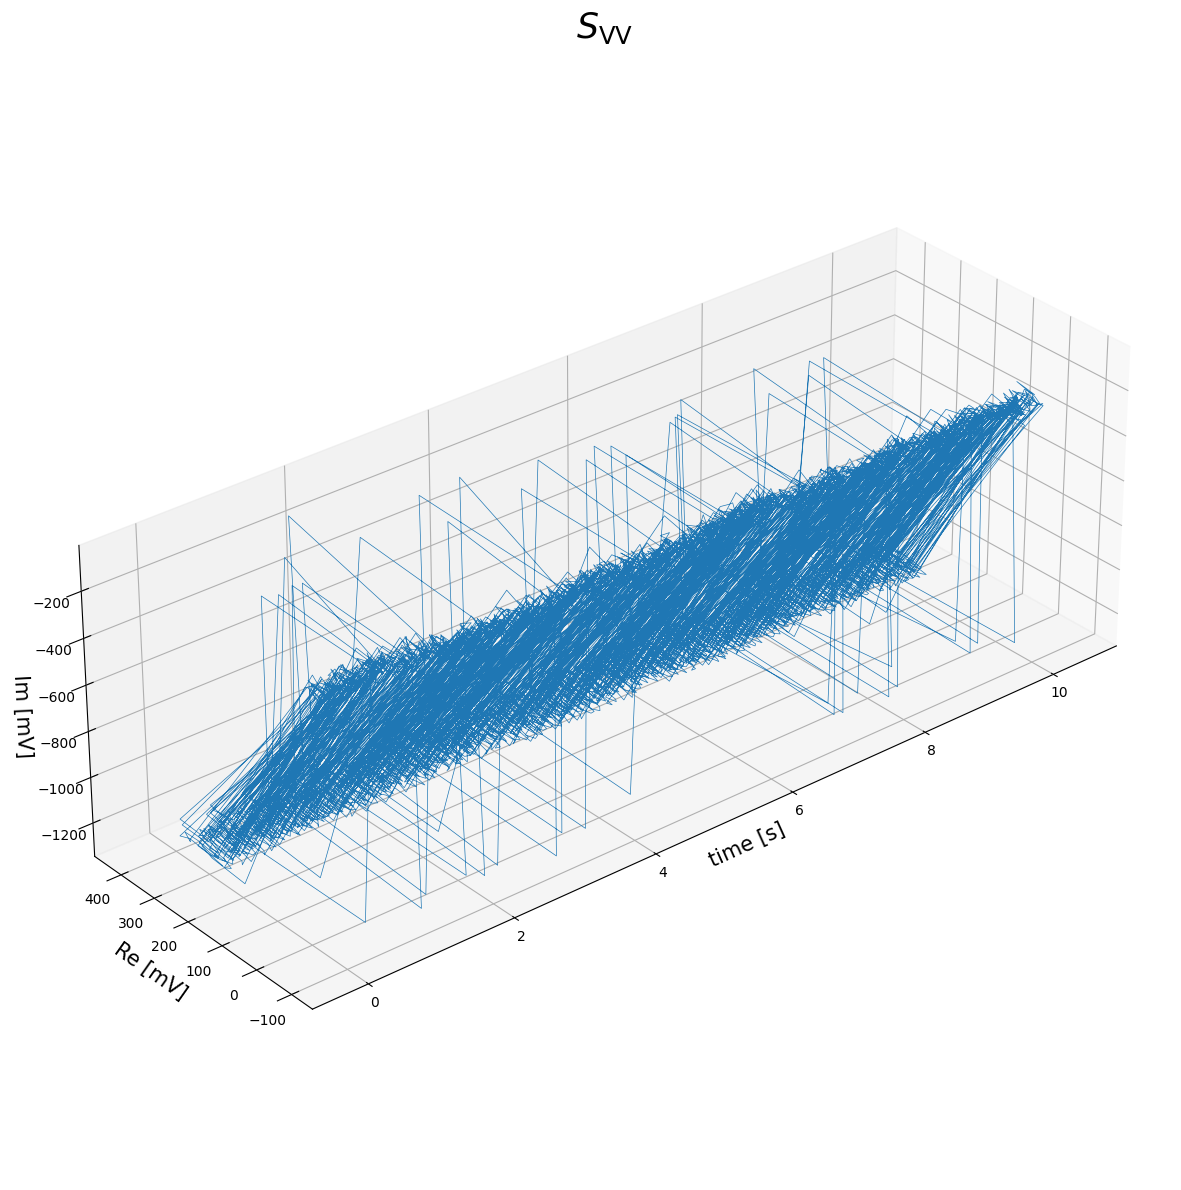

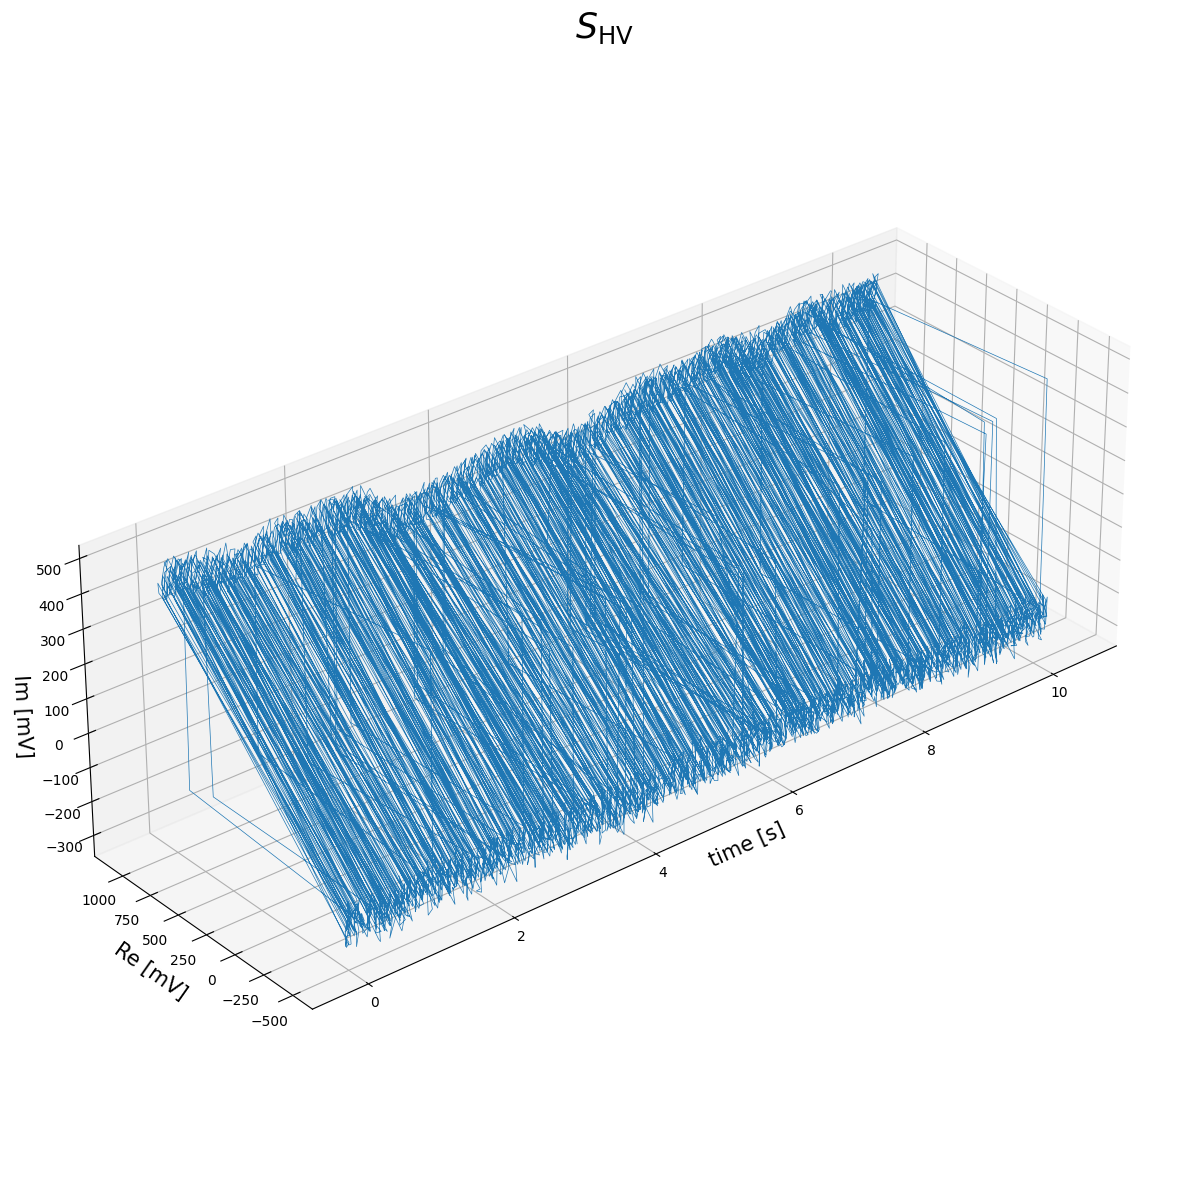

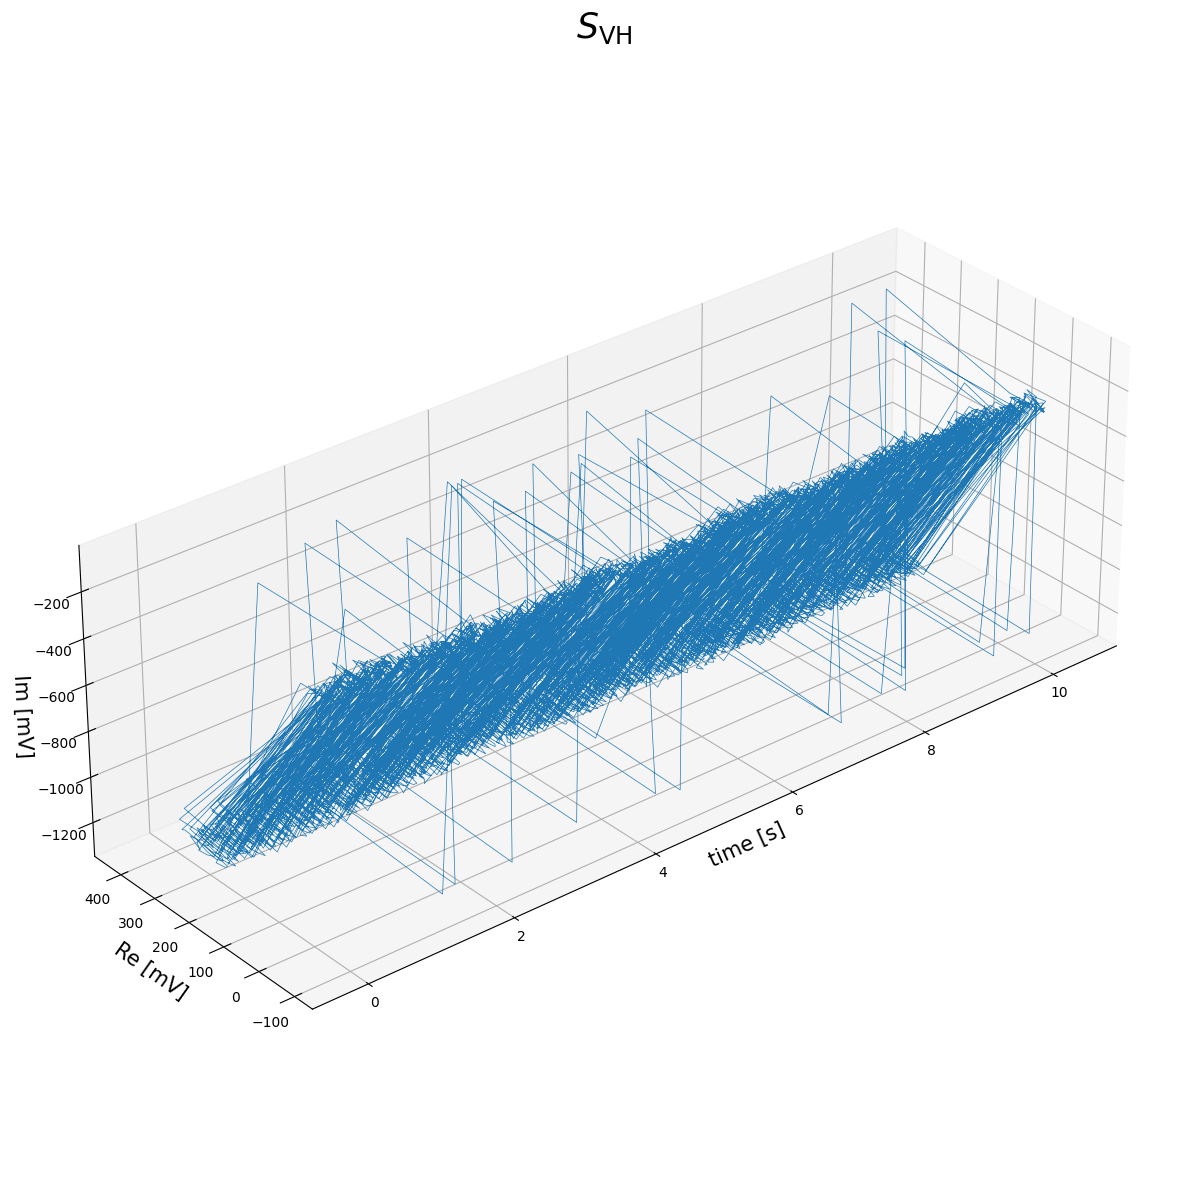

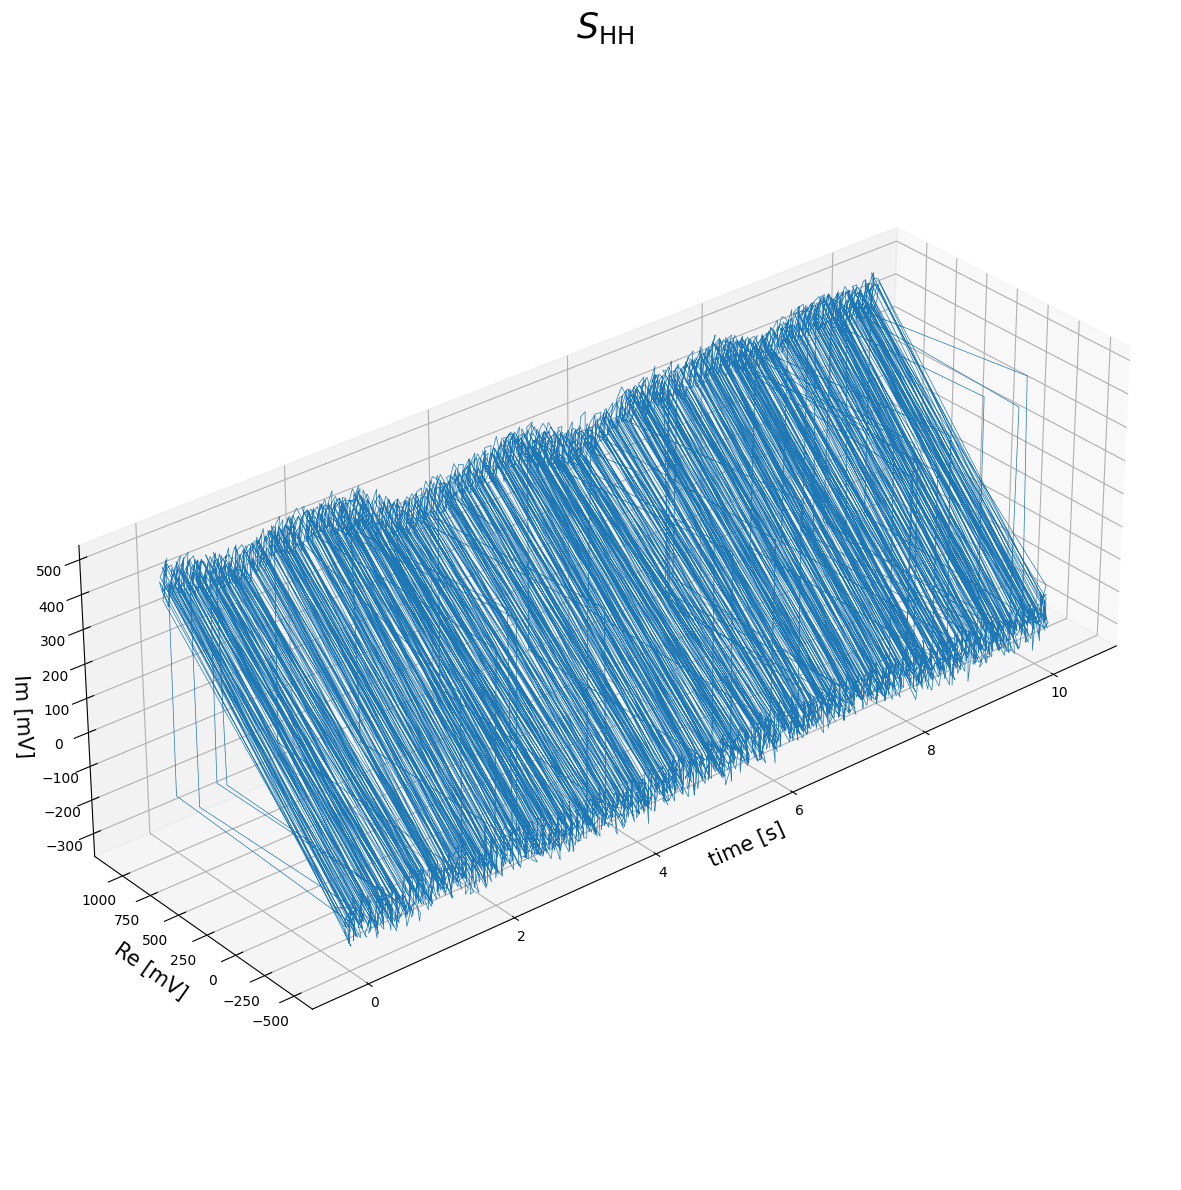

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os

date = '20221027'
action = 'air'
round = '2'

f = open(os.path.join(os.getcwd(),"../data",'{0}_{1}_{2}.dat'.format(date, action, round)), 'r')
df = np.genfromtxt(os.path.join(os.getcwd(),"../data",'{0}_{1}_{2}.dat'.format(date, action, round)), delimiter=",",)  # np.genfromtxt()を使うと欠損値がnp.nanとして読み込まれる
df = (df-2048)/2048*2500 #DA変換

# Tx1-Rx1 Svv=I1+jQ1
I1 = df[0::2, 0]
Q1 = df[0::2, 1]
# Tx1-Rx2 Shv=I2+jQ2
I2 = df[0::2, 2]
Q2 = df[0::2, 3]
# Tx2-Rx1 Svh=I3+jQ3
I3 = df[1::2, 0]
Q3 = df[1::2, 1]
# Tx2-Rx2 Shh=I4+jQ4
I4 = df[1::2, 2]
Q4 = df[1::2, 3]

t1= np.arange(0,np.size(I1))/freq*2
t2= np.arange(0,np.size(I3))/freq*2

fig1 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax1 = fig1.add_subplot(projection="3d")
ax1.view_init(elev=30, azim=-130)
ax1.set_box_aspect((3,1,1))
ax1.set_title("$S_\mathrm{VV}$",size = 25)
ax1.set_xlabel("time [s]",size=15)
ax1.set_ylabel("Re [mV]",size=15)
ax1.set_zlabel("Im [mV]",size=15)
ax1.plot(t1,I1,Q1,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(),"../img","{0}_{1}_{2}_IQ4_2Tx2Rx_Svv".format(date, action, round)))
plt.show()

fig2 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax2 = fig2.add_subplot(projection="3d")
ax2.view_init(elev=30, azim=-130)
ax2.set_box_aspect((3,1,1))
ax2.set_title("$S_\mathrm{HV}$",size = 25)
ax2.set_xlabel("time [s]",size=15)
ax2.set_ylabel("Re [mV]",size=15)
ax2.set_zlabel("Im [mV]",size=15)
ax2.plot(t1,I2,Q2,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(),"../img","{0}_{1}_{2}_IQ4_2Tx2Rx_Shv".format(date, action, round)))
plt.show()

fig3 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax3 = fig3.add_subplot(projection="3d")
ax3.view_init(elev=30, azim=-130)
ax3.set_box_aspect((3,1,1))
ax3.set_title("$S_\mathrm{VH}$", size = 25)
ax3.set_xlabel("time [s]",size=15)
ax3.set_ylabel("Re [mV]",size=15)
ax3.set_zlabel("Im [mV]",size=15)
ax3.plot(t2,I3,Q3,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(),"../img","{0}_{1}_{2}_IQ4_2Tx2Rx_Svh".format(date, action, round)))
plt.show()

fig4 = plt.figure(facecolor="white", figsize=(16, 12),dpi=100)
ax4 = fig4.add_subplot(projection="3d")
ax4.view_init(elev=30, azim=-130)
ax4.set_box_aspect((3,1,1))
ax4.set_title("$S_\mathrm{HH}$",size = 25)
ax4.set_xlabel("time [s]",size=15)
ax4.set_ylabel("Re [mV]",size=15)
ax4.set_zlabel("Im [mV]",size=15)
ax4.plot(t2,I4,Q4,lw=0.5)
plt.tight_layout()
plt.savefig(os.path.join(os.getcwd(),"../img","{0}_{1}_{2}_IQ4_2Tx2Rx_Shh".format(date, action, round)))
plt.show()

%matplotlib inline

In [4]:
np.max(I1)

439.453125

In [7]:
I1[4705]-I1[4706]

-6.103515625

In [ ]:
for i in range(len(I1)-1):
    if(abs(I1[i]-I1[i+1])<40)